In [155]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import gamma
from scipy.stats import norm
from scipy.optimize import minimize
import scipy
from random import choices
import pandas as pd

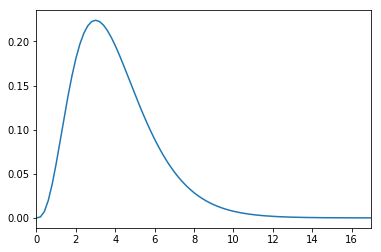

In [156]:
def prob_Gamma(alpha,beta,x):
    p = ((beta**alpha)/gamma(alpha))*x**(alpha-1)*np.exp(-beta*x)
    return p

x = np.linspace(0,100,num=500)

prob = prob_Gamma(4,1,x)

plt.plot(x,prob)
plt.xlim(0,17)
plt.show()

## Question 1

## Part A

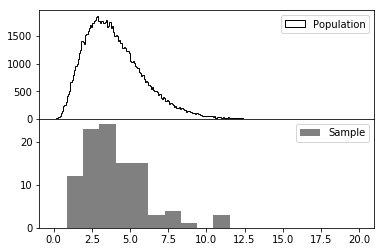

In [182]:
pop = np.random.gamma(4,1,100000)
samp = np.random.gamma(4,1,100)
fig, ax = plt.subplots(nrows=2,ncols=1,sharex=True)
ax[0].hist(pop,histtype='step',color='black',bins=250,label='Population')
ax[0].legend(loc='best')
ax[1].hist(samp,color='gray',label='Sample')
ax[1].legend(loc='best')
fig.subplots_adjust(hspace=0)
plt.savefig('plots/p1_a.png')
plt.show()

In [183]:
sampMean = np.mean(samp)
sampVar = np.var(samp)

analyMean = 4/1
analyVar = 4/1

print("Sample Mean and Var: %s, %s "%(sampMean,sampVar))
print("Analytic Mean and Var: %s, %s"%(analyMean,analyVar))


Sample Mean and Var: 4.049605189116403, 4.447080125911489 
Analytic Mean and Var: 4.0, 4.0


## Part B

In [184]:
# Jack Knife
jk_samp = []

# Runs the jack knife
for i in range(len(samp)):
    jk_s = np.delete(samp,i) 
    jk_samp.append(np.mean(jk_s**2)/np.mean(jk_s**4)) # calculates the statistic

jk_samp = np.array(jk_samp)



Jack knife Statistic:  0.021010938169590737 , Standard Error:  0.004162289016818462
Jack Knife Bias:  0.0010881556702192173
Population Statistic:  0.02350229918038941


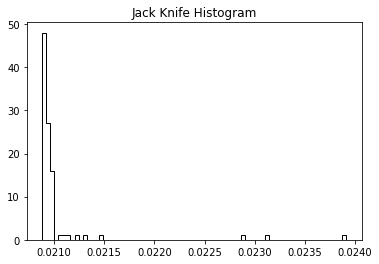

In [185]:
# Calculating the Standard error
theta_dot = np.mean(jk_samp)
jk_se = np.sqrt((len(samp)-1)/len(samp)*np.sum(np.square(theta_dot-jk_samp)))
print('Jack knife Statistic: ',theta_dot,', Standard Error: ',jk_se)

# Calculating the bias
theta = np.mean(samp**2)/np.mean(samp**4)
jk_bias = (len(samp)-1)*(theta_dot-theta)
print('Jack Knife Bias: ',jk_bias)

# Calculating the statistic of the population
pop_stat = np.mean(pop**2)/np.mean(pop**4)
print('Population Statistic: ',pop_stat)

# Plotting a histogram
plt.hist(jk_samp,color='black',histtype='step',bins=75)
plt.title('Jack Knife Histogram')
plt.savefig('plots/p1_b.png')
plt.show()


## Problem 2

In [186]:
# Boot Strap
nboots = 200
ndata = 90 
boot_vals = [] # boot strap stat

for i in range(nboots):
    boot_samp = np.random.choice(samp,ndata)
    pop_samp = np.random.choice(pop,ndata)
    boot_vals.append(np.mean(boot_samp**2)/np.mean(boot_samp**4))
boot_vals = np.array(boot_vals)   




Boot Strap Statistic:  0.022235231060830384 Standard Error:  0.004468478932403043
Boot Strap Bias:  0.0012352843626560021


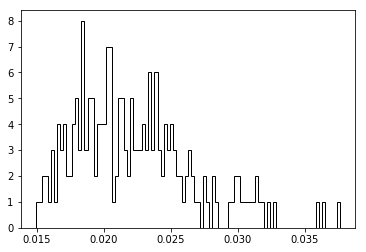

In [187]:
# Calculating the standard error
boot_stat = np.mean(boot_vals)
boot_se = np.sqrt(np.sum((boot_vals-boot_stat)**2)/(nboots-1))

print("Boot Strap Statistic: ",boot_stat, "Standard Error: ",boot_se)

# Calculating the bias
theta = np.mean(samp**2)/np.mean(samp**4)
boot_bias = boot_stat - theta
print('Boot Strap Bias: ',boot_bias)


plt.hist(boot_vals,color='black',histtype='step',label='Sample',bins=100)
plt.savefig('plots/p2.png')
plt.show()


## Problem 3

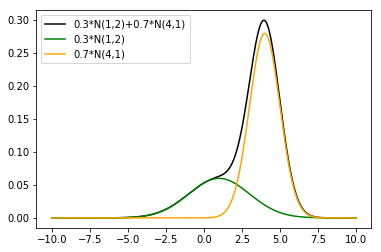

In [169]:
# Writing the distribution function
n1 = norm(loc=1,scale=2)
n2 = norm(loc=4,scale=1)

def dist(x):
    p = 0.3*n1.pdf(x)+0.7*n2.pdf(x)
    return p

# Creating distribution values
x = np.linspace(-10,10,num=10**6)
p = dist(x)
p1 = 0.3*n1.pdf(x)
p2 = 0.7*n2.pdf(x)

# Plotting the distribution for a sanity check
plt.plot(x,p,color='black',label='0.3*N(1,2)+0.7*N(4,1)')
plt.plot(x,p1,color='green',label='0.3*N(1,2)')
plt.plot(x,p2,color='orange',label='0.7*N(4,1)')
plt.legend(loc='best')
plt.savefig('plots/normal_plots.png')
plt.show()



# Mean is 3.1

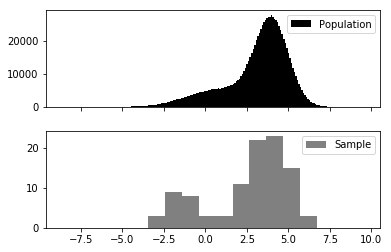

In [189]:
## Picks random values from the distribution 
# Creates both a population (invisible) values &
# a sample 
pop = np.array(choices(x,p,k=10**6))
samp = np.array(choices(x,p,k=100))

fig, ax = plt.subplots(nrows=2,ncols=1,sharex=True)

# Histogram of the population and sample for sanity check
ax[0].hist(pop,color='black',bins=200,label="Population")
ax[0].legend(loc='best')
ax[1].hist(samp,color='gray',label='Sample')
ax[1].legend(loc='best')
fig.subplots_adjust(hspace=.25)
plt.savefig('plots/p3_hist.png')
plt.show()


In [190]:
np.mean(samp**2)/np.mean(samp**4)

0.05019263335598103

In [191]:
# Boot strap sample
nboots = 200
ndata = 90
boot_vals = []

for i in range(nboots):
    boot_samp = np.random.choice(samp,ndata)
    boot_vals.append(np.mean(boot_samp**2)/np.mean(boot_samp**4))

boot_vals = np.array(boot_vals)   


Bootstrap value: 0.05069276459667584 , Standard Error: 0.003666486863392156
Boot Strap Bias:  0.0005001312406948122


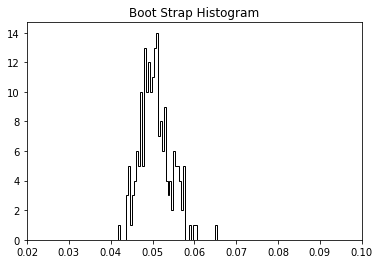

In [192]:
# Calculating the Bootstrap Expectation
boot = np.mean(boot_vals)

# Standard error
boot_se = np.sqrt(np.sum((boot_vals-boot)**2)/(nboots-1))
print('Bootstrap value:',boot,', Standard Error:',boot_se)

# Calculating the bias
theta = np.mean(samp**2)/np.mean(samp**4)
boot_bias = boot - theta
print('Boot Strap Bias: ',boot_bias)

# Creating plots of the statistic 
plt.hist(boot_vals,color='black',histtype='step',label='Boot Strap',bins=50)
plt.title('Boot Strap Histogram')
plt.xlim(0.02,0.1)
plt.savefig('plots/p3_bootstrapHist.png')
plt.show()

In [193]:
# Jack Knife
jk_val = []
for i in range(len(samp)):
    jk = np.delete(samp,i) # Deletes the ith index
    jk_val.append(np.mean(jk**2)/np.mean(jk**4)) # calculates the statistic
jk_val = np.array(jk_val)


Jack knife:  0.05019698909937308 , Standard Error:  0.0035653418759891546
Jack Knife Bias:  0.0004312185958126394


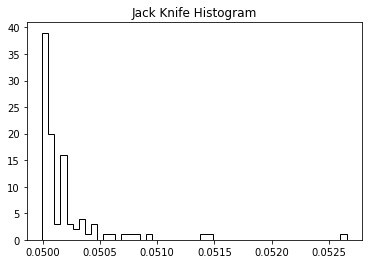

In [194]:
# Calculating the Standard error
theta_dot = np.mean(jk_val)
jk_se = np.sqrt((len(samp)-1)/len(samp)*np.sum(np.square(theta_dot-jk_val)))
print('Jack knife: ',theta_dot,', Standard Error: ',jk_se)

# Calculating the bias
theta = np.mean(samp**2)/np.mean(samp**4)
jk_bias = (len(samp)-1)*(theta_dot-theta)
print('Jack Knife Bias: ',jk_bias)

# Plotting a histogram
plt.hist(jk_val,color='black',histtype='step',bins=50)
plt.title('Jack Knife Histogram')
plt.savefig('plots/p3_jkHist.png')
plt.show()

## Problem 4

In [195]:
dt = pd.read_table('data.txt',sep=' ')
x_dt = dt['x']
y_dt = dt['y']
err_dt = dt['err']

def model(x,b):
    y = b[0]*np.exp(-b[1]*x)+b[2]*np.exp(-0.5*(x-b[3])**2/b[4]**2)
    return y

def chi_square(b):
        return np.sum(((model(xx,b)-yy)/err)**2)

In [196]:
# Boot strapping

ndata = 20 # picking a sub sample of 20 data points from the 23
nboots = 200
boot_val = []

for i in range(nboots):
    
    # Creates the boot strap sample
    samp = dt.sample(ndata)
    xx = samp['x']
    yy = samp['y']
    err = samp['err']
    
    # Initial guesses
    b0 = np.array([3,2,1.5,4,2])
    
    # Minimizing
    options = {'maxiter':1000}
    b_opt = minimize(chi_square,b0,options=options)
    if b_opt.success == True:
        b = b_opt.x
        boot_val.append(b[2]*b[4])
    else:
        boot_val.append(100)
        
boot_val = np.array(boot_val)


Boot:  2.136558858106946 +/- 0.07030403190607767


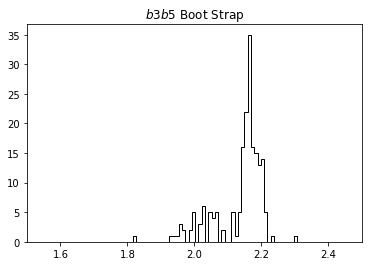

In [200]:
# Calculating the boot strap and error
boot = np.mean(boot_val[boot_val<5])
boot_se = np.sqrt(np.sum((boot_val[boot_val<5]-boot)**2)/(nboots-1))
print('Boot: ',boot,'+/-',boot_se)

# Plotting the histogram
plt.hist(boot_val[boot_val<5],color='black',histtype='step',bins=50)
plt.xlim(1.5,2.5)
plt.title('$b3b5$ Boot Strap')
plt.savefig('plots/p4_bootHist.png')
plt.show()

In [179]:
# Jack Knife

jk_val = []

for i in range(dt.shape[0]):
    
    # Creates the Jack Knife sample
    samp = dt.drop(dt.index[i])
    xx = samp['x']
    yy = samp['y']
    err = samp['err']
    
    # Initial guesses
    b0 = np.array([3,2,1.5,4,2])
    
    # Minimizing
    options = {'maxiter':1000}
    b_opt = minimize(chi_square,b0,options=options)
    if b_opt.success == True:
        b = b_opt.x
        jk_val.append(b[2]*b[4])
    else:
        jk_val.append(100)
jk_val = np.array(jk_val)

Jack knife:  2.1544130664656076 +/- 0.16313667148262445


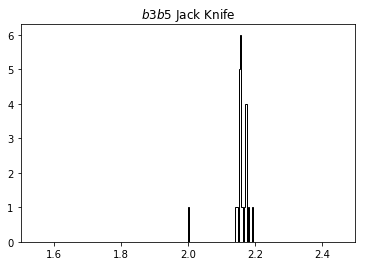

In [180]:
# Calculating the statistic
jk = np.mean(jk_val[jk_val<5])
jk_se = np.sqrt((len(jk_val[jk_val<5])-1)/len(jk_val[jk_val<5])*np.sum(np.square(jk-jk_val[jk_val<5])))
print('Jack knife: ',jk,'+/-',jk_se)

# Plotting the histogram
plt.hist(jk_val[jk_val<5],color='black',histtype='step',bins=50)
plt.xlim(1.5,2.5)
plt.title('$b3b5$ Jack Knife')
plt.savefig('plots/p4_jk.png')
plt.show()